# Author: Kumar R.

# Assignment: Time Series

In this task I have to make ARIMA model over shampoo salesdata and check the MSE between predicted and actual value.

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0,parse_dates=True,index_col='Month')

In [3]:
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [4]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1-01 to Sales of shampoo over a three year period
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1)
memory usage: 592.0+ bytes


In [5]:
series.isnull().any(), series.isna().sum()

(Sales of shampoo over a three year period    True
 dtype: bool,
 Sales of shampoo over a three year period    1
 dtype: int64)

In [6]:
#Delete null values
series = series.dropna()

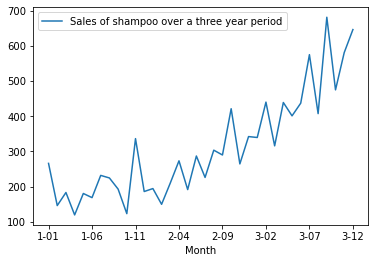

In [7]:
#Visualization of actual data
series.plot()
plt.show()

In [8]:
#Converting to numpy array
sales = series.values
sales

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [9]:
size = int(len(sales) * 0.60)
print(f"Total length: {len(sales)}")
print(f"Training size: {size}")

Total length: 36
Training size: 21


In [10]:
#Train test split
train, test = sales[0:size], sales[size:len(sales)]

In [11]:
#ARIMA model
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print("------------------------------------------")
print(f"TEST Mean Square Error :{error}")

Predicted=[272.96449841],Expected =[421.6]
Predicted=[290.31371648],Expected =[264.5]
Predicted=[349.11773367],Expected =[342.3]
Predicted=[306.51300163],Expected =[339.7]
Predicted=[387.37643617],Expected =[440.4]
Predicted=[348.15420942],Expected =[315.9]
Predicted=[386.30879763],Expected =[439.3]
Predicted=[356.0820629],Expected =[401.3]
Predicted=[446.37948437],Expected =[437.4]
Predicted=[394.73730893],Expected =[575.5]
Predicted=[434.91546906],Expected =[407.6]
Predicted=[507.92336853],Expected =[682.]
Predicted=[435.48270978],Expected =[475.3]
Predicted=[652.74386804],Expected =[581.3]
Predicted=[546.34350458],Expected =[646.9]
------------------------------------------
TEST Mean Square Error :7547.808140322868


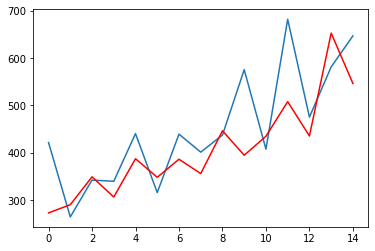

In [12]:
#Visualization of Expected vs predicted data
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()